In [4]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("All Imports Successful :)")

All Imports Successful :)


In [5]:
def controlled_multiplicaion_by_a_mod_15(a, power):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' should be :-  2, 7, 8, 11 or 13")
    quantum_circuit = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2, 13]:
            quantum_circuit.swap(0, 1)
            quantum_circuit.swap(1, 2)
            quantum_circuit.swap(2, 3)
        if a in [7, 8]:
            quantum_circuit.swap(2, 3)
            quantum_circuit.swap(1, 2)
            quantum_circuit.swap(0, 1)
        if a == 11:
            quantum_circuit.swap(1, 3)
            quantum_circuit.swap(0, 2)
        if a in [7, 11, 13]:
            for q in range(4):
                quantum_circuit.x(q)
    quantum_circuit = quantum_circuit.to_gate()
    quantum_circuit.name = "%i^%i mod 15" % (a, power)
    c_quantum_circuit = quantum_circuit.control()
    return c_quantum_circuit

In [6]:
n_count = 8  
a = 7

In [7]:
def quantum_fourier_trancformation_chapter_dagger(n):
    quantum_circuit = QuantumCircuit(n)
    
    for qubit in range(n//2):
        quantum_circuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            quantum_circuit.cp(-np.pi/float(2**(j-m)), m, j)
        quantum_circuit.h(j)
    quantum_circuit.name = "QFT†"
    return quantum_circuit

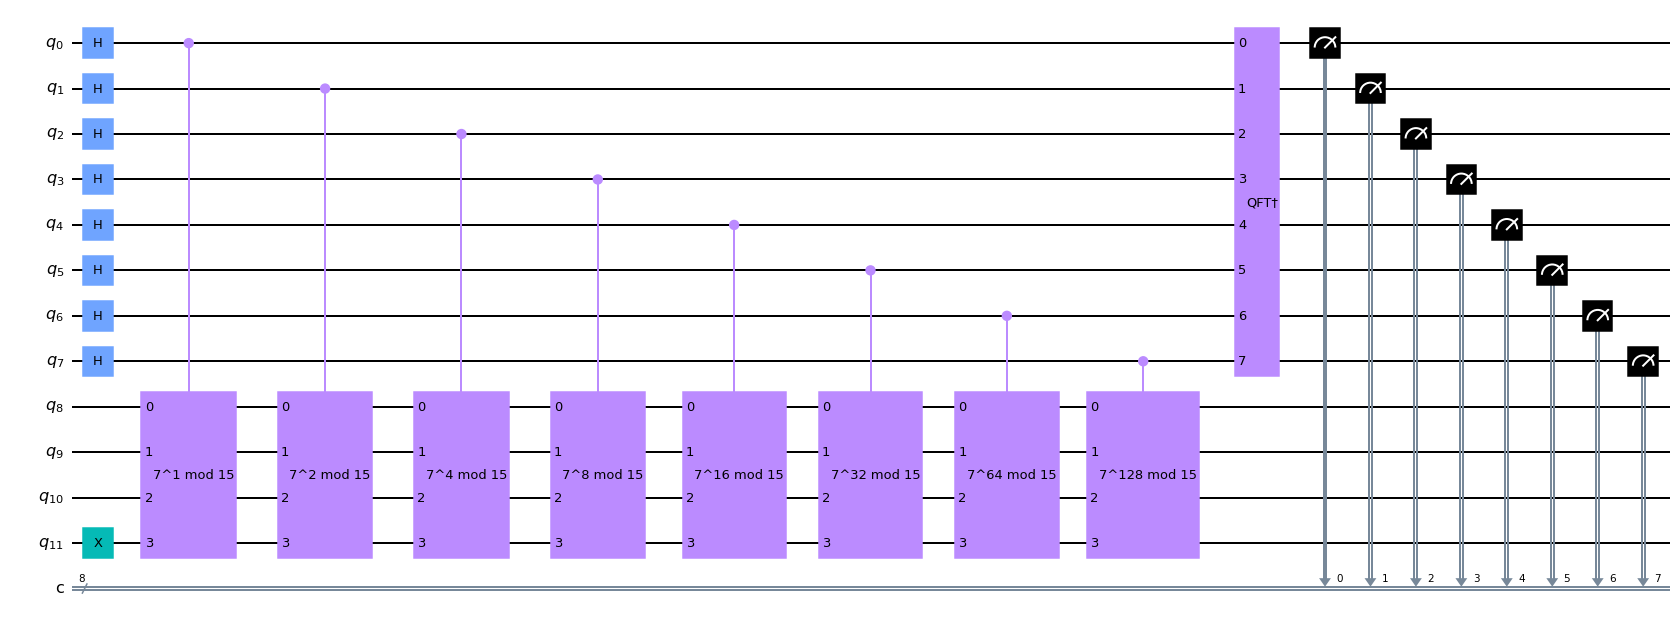

In [8]:
quantum_circuit = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    quantum_circuit.h(q)
    
quantum_circuit.x(3+n_count)

for q in range(n_count):
    quantum_circuit.append(controlled_multiplicaion_by_a_mod_15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

quantum_circuit.append(quantum_fourier_trancformation_chapter_dagger(n_count), range(n_count))

quantum_circuit.measure(range(n_count), range(n_count))
quantum_circuit.draw(fold=-1) 

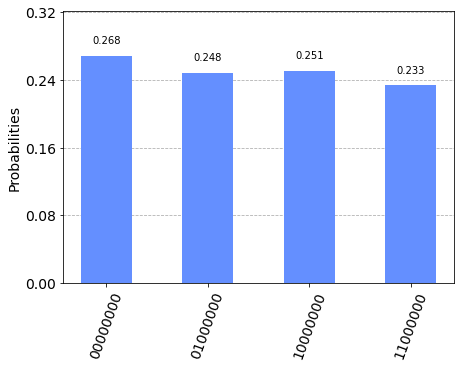

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
t_quantum_circuit = transpile(quantum_circuit, aer_sim)
qobj = assemble(t_quantum_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  00000000(bin) =   0(dec)    0/256 = 0.00


In [11]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [12]:
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [13]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.25      1/4            4
2   0.50      1/2            2
3   0.00      0/1            1
